# (2) YOLOv8 실습

### YOLOv8은 객체 탐지 모델임

### 본 노트는 Roboflow를 이용한 YOLOv8용 데이터셋 구축과 이를 사용한 객체 탐지를 수행함

- 참고 : https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/

---

## Install YOLOv8, Roboflow

- YOLOv8, Roboflow 관련 라이브러리 설치

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

import os
import glob

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# 데이터셋 폴더 생성
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


## Get dataset from Roboflow

- 데이터셋 내려받기

   - 압축 파일 : https://drive.google.com/file/d/14dyS8d9WfSMqhlLNei6cAGweivNs54uC/view?usp=sharing
   
   - 데이터셋은 이미지 파일과 레이블 정보(xml)로 구성

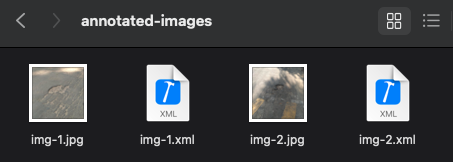

- 레이블 정보는 바운딩 박스의 좌표 값 정보로, 이런 식으로 구성됨

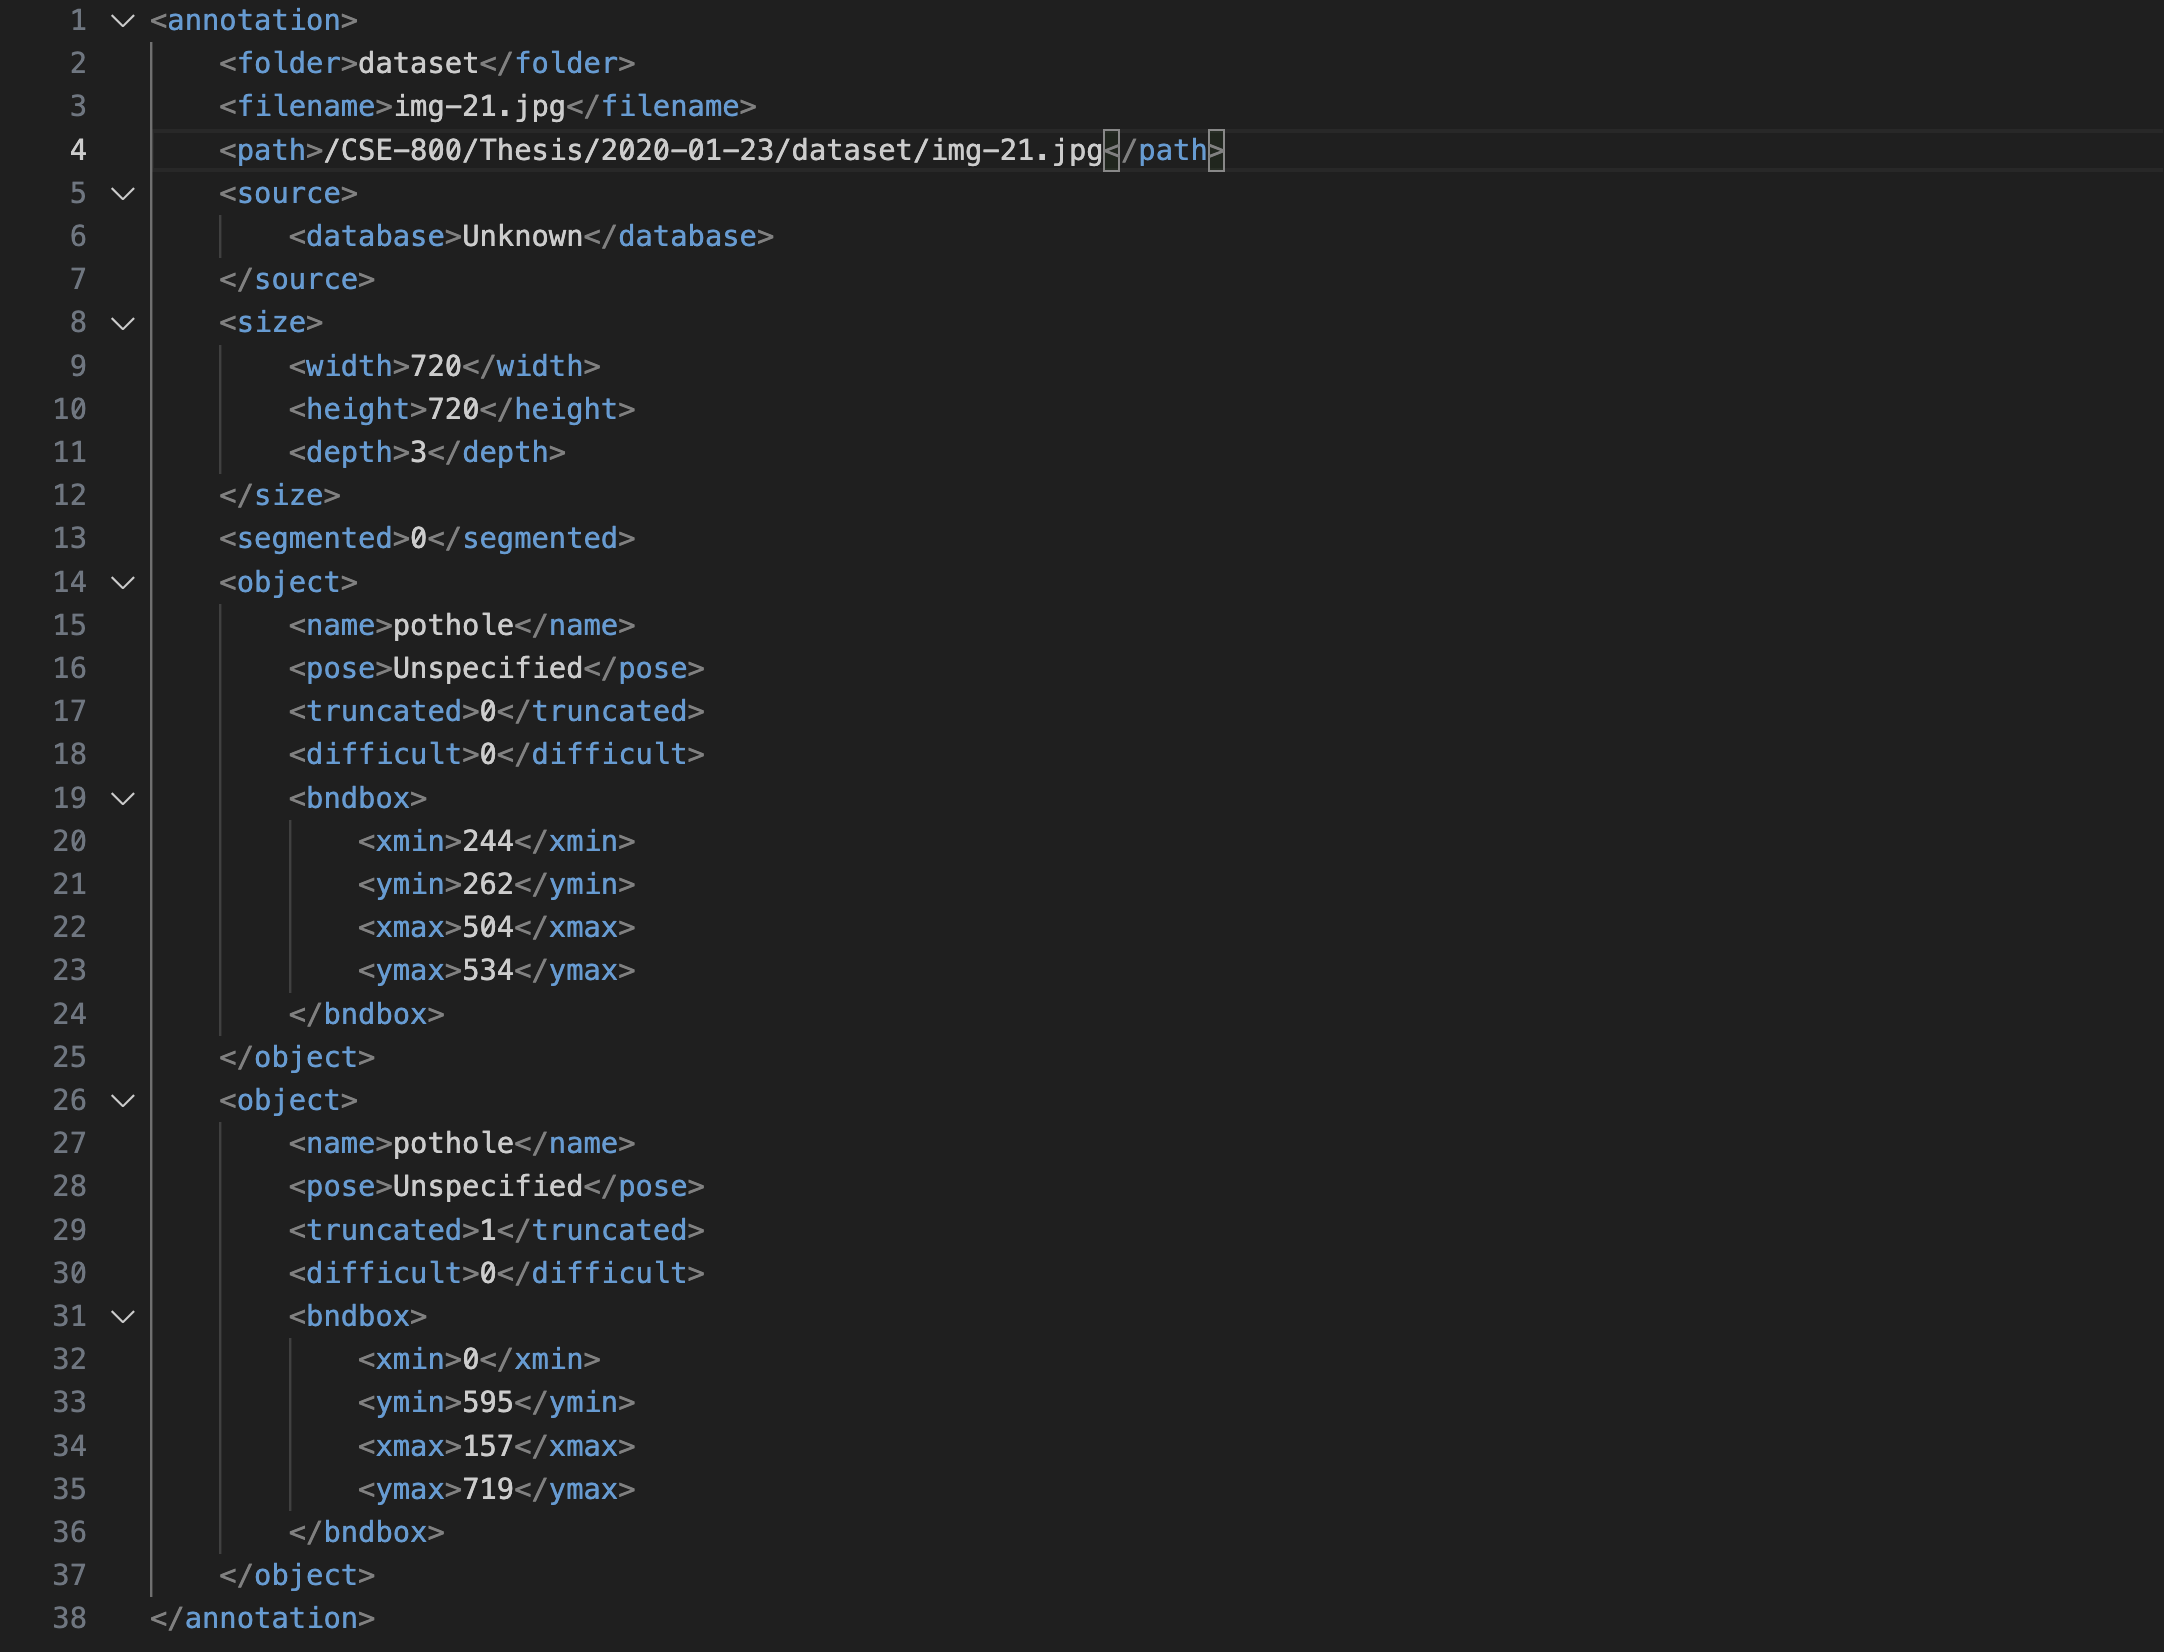

- 압축 파일 풀기

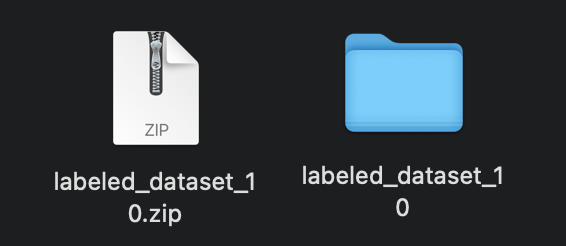

- Roboflow 로그인 하기

  - https://app.roboflow.com/login

- Project 생성하기

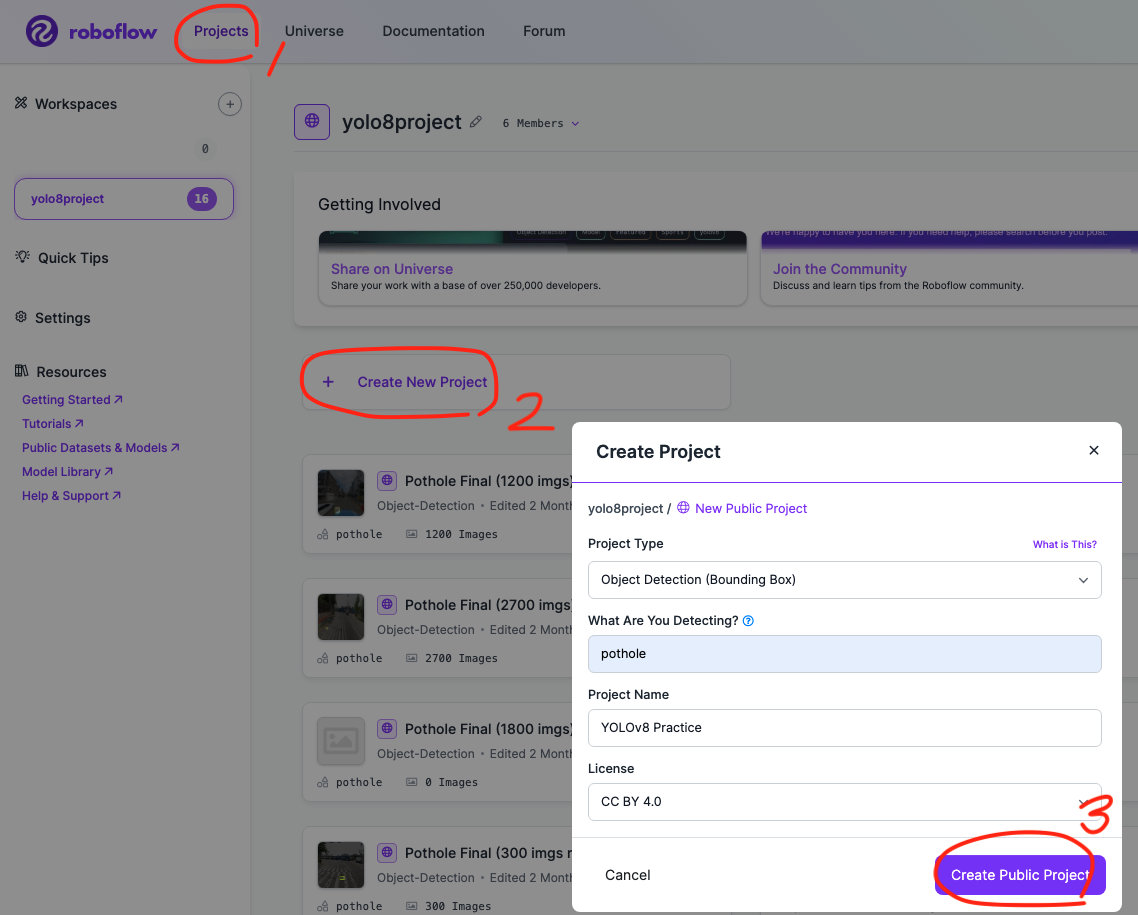

- 압축 푼 폴더 업로드 하기

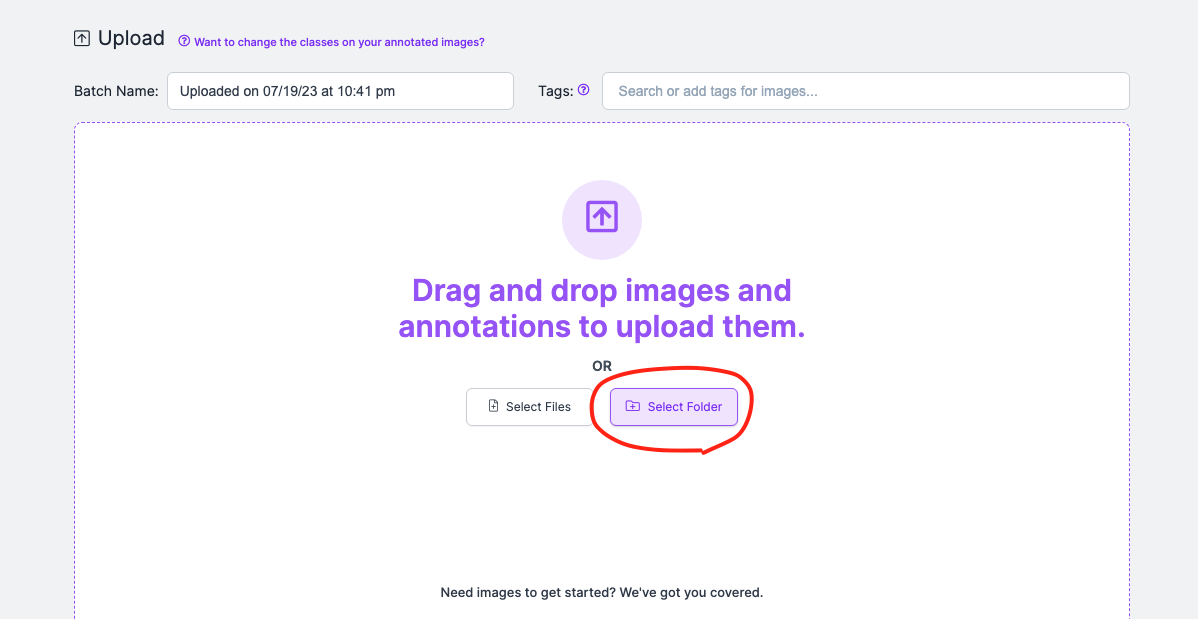

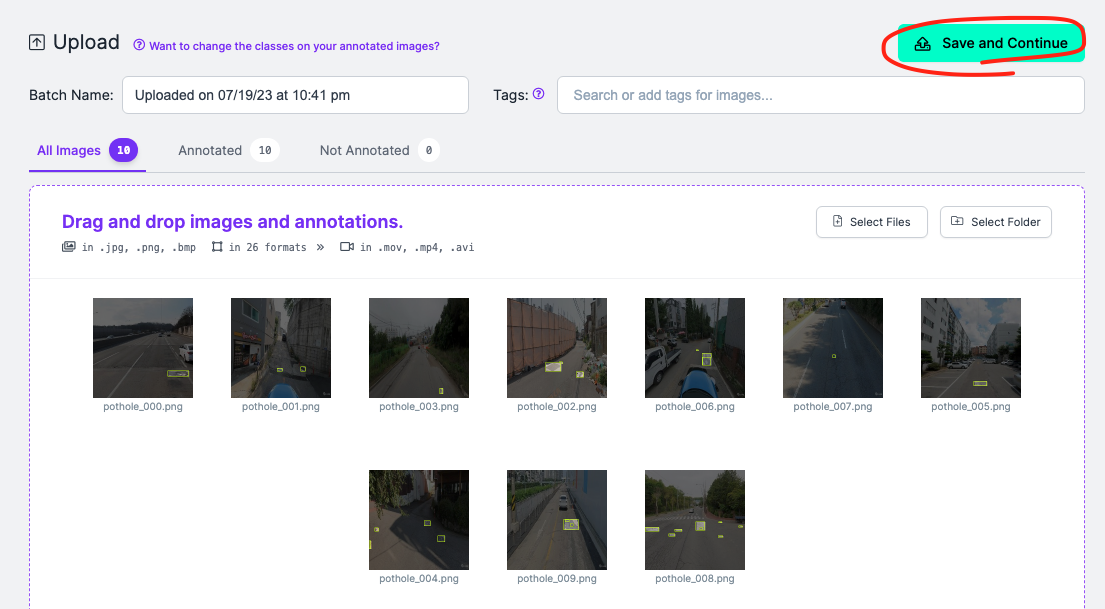

- Preprocessing, Augmentation 설정

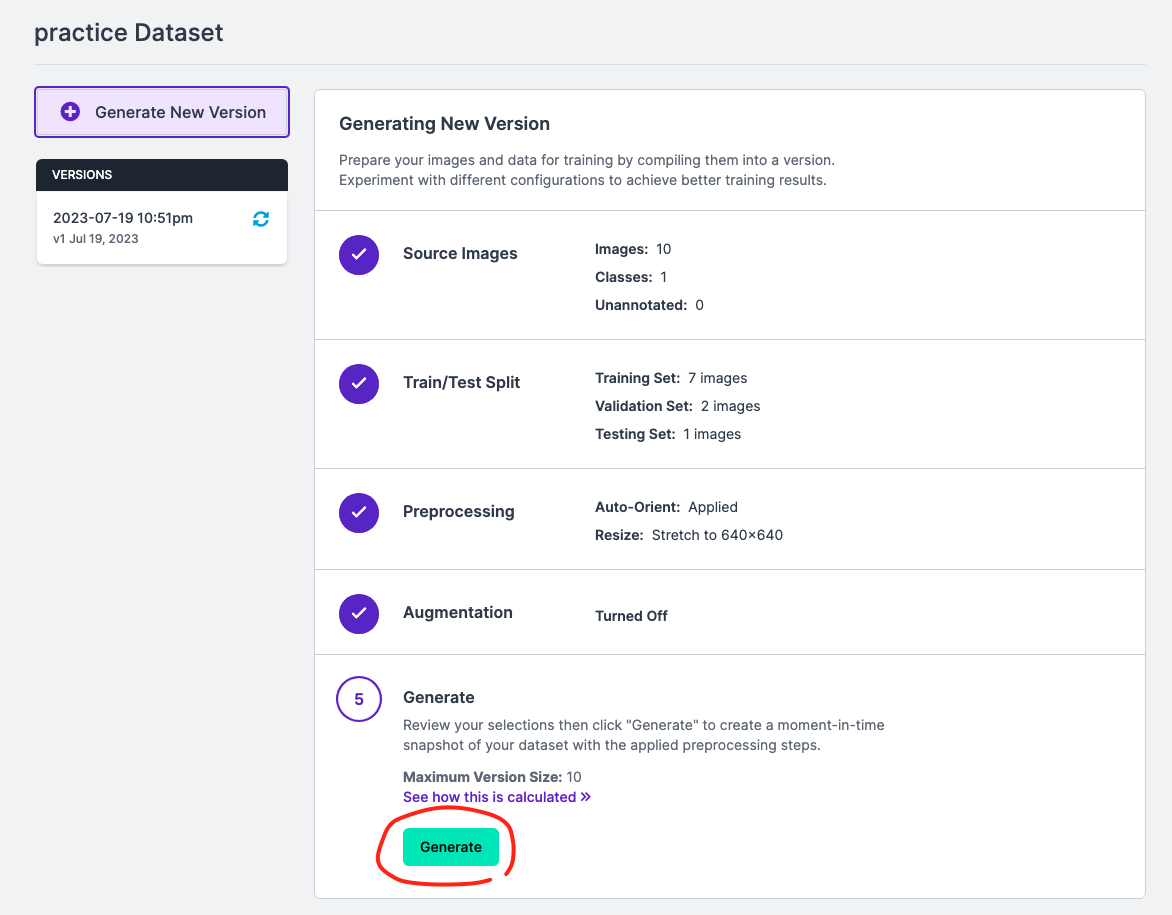

- YOLOv8용 데이터셋 만들기

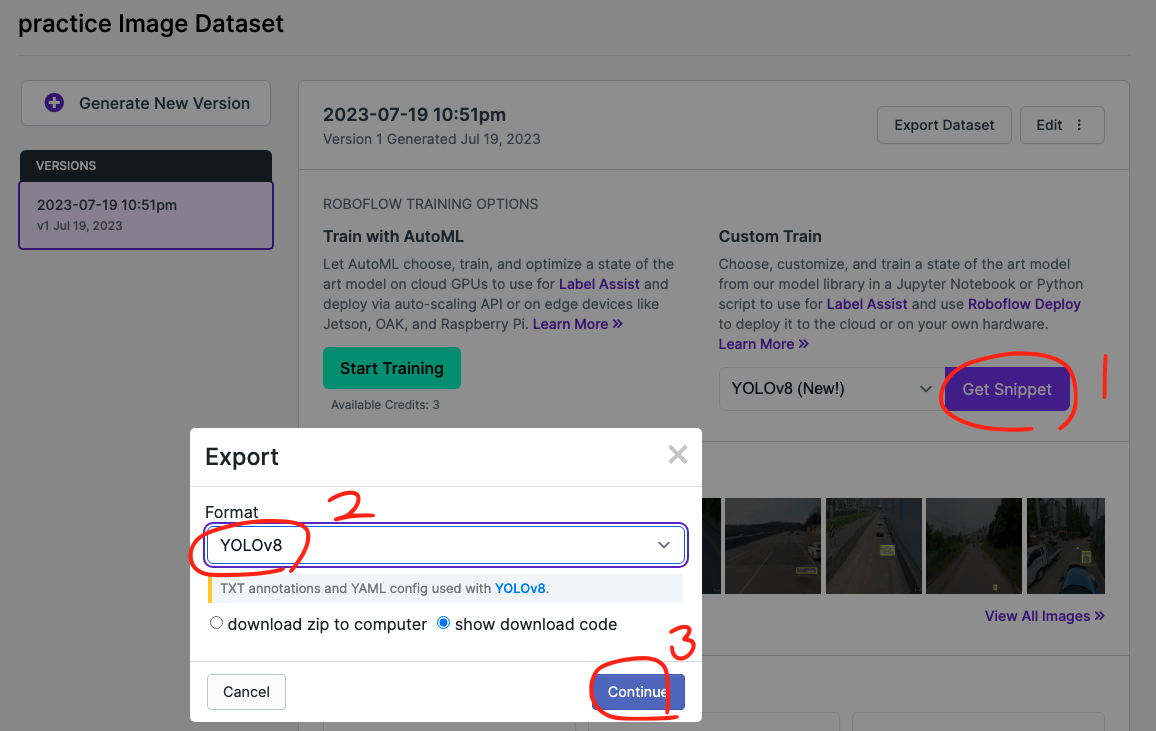

- 다운로드 코드 복사하기

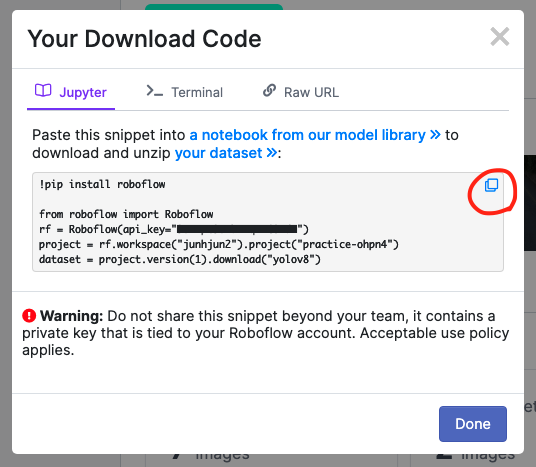

- 복사한 코드 붙여넣기

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9owDpt9sZbzzqnRGOPdW")
project = rf.workspace("junhjun2").project("practice-ohpn4")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to practice-1 in yolov8:: 100%|██████████| 32/32 [00:00<00:00, 4393.52it/s]


- 여기까지 하면 Roboflow에서 YOLOv8용 데이터셋을 받아 온 것

- '/datasets/프로젝트 폴더/data.yaml' 경로 확인

- 'data.yaml' 파일을 찾아야 함

## Train model

- 'data.yaml' 파일을 한 번 확인해보면, 탐지하려는 객체의 클래스는 'pothole'이고 train/test/valid 데이터가 들어있는 경로도 적혀있음

  - 모델 학습에 대한 정보를 제공해주는 파일임

- 아래 학습 코드에 'data.yaml' 파일의 경로 넣어주기

  - data = 'data.yaml' 파일 경로

In [ ]:
# YOLOv8 모델 학습
%%time

%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/practice-1/data.yaml' epochs=30 imgsz=512 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 165MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Pothole-Final-(300-imgs)-1/data.yaml, epochs=500, patience=50, batch=16, imgsz=512, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [ ]:
# 학습된 모델 저장
# # Download 'best.pt'
# from google.colab import files

# filename = '/content/runs/detect/train/weights/best.pt'
# files.download(filename)

## Result

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)

## Predict

- 학습된 모델을 이용하여 테스트 해보기

- model = ~ best.pt

  - 학습 과정에서 성능이 가장 좋았을 때 저장된 모델임
  
  - 이 모델을 사용해서 예측(객체 탐지) 하겠다는 것

- source = 테스트 데이터 또는 원하는 이미지 데이터의 경로 넣기

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/datasets/Pothole-Final-(2100-imgs)/test/images' save=True

/content
2023-05-25 14:18:31.063398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 14:18:31.976694: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    retur

- '/runs/detect/predict/' 폴더에 예측 결과가 저장됨

- 예측 결과 확인

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*'):
      display(Image(filename=image_path, width=400))
      print("\n")

---

- 객체 탐지의 전체 과정을 이해해보기

  - (1) {이미지 - 레이블} 쌍으로 된 데이터셋 구축하는 것

  - (2) 모델 학습시키는 것
  
  - (3) 학습된 모델을 가지고 새로운 데이터에 대해 예측하는 것